# Load Packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import missingno as msn
import lifelines as lfl
import scipy.stats as st

# Import Data

In [2]:
df = pd.read_csv("cirrhosis.csv")

# Data Glimpse

In [3]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [5]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

Some first insights of this raw analysis:
* There was a patient with 1775 cholesterol!! (max is 190);
* Age is also in days and needs to be changed;
* There are 18 patients in this dataset

## Is there any missing data?

<AxesSubplot:>

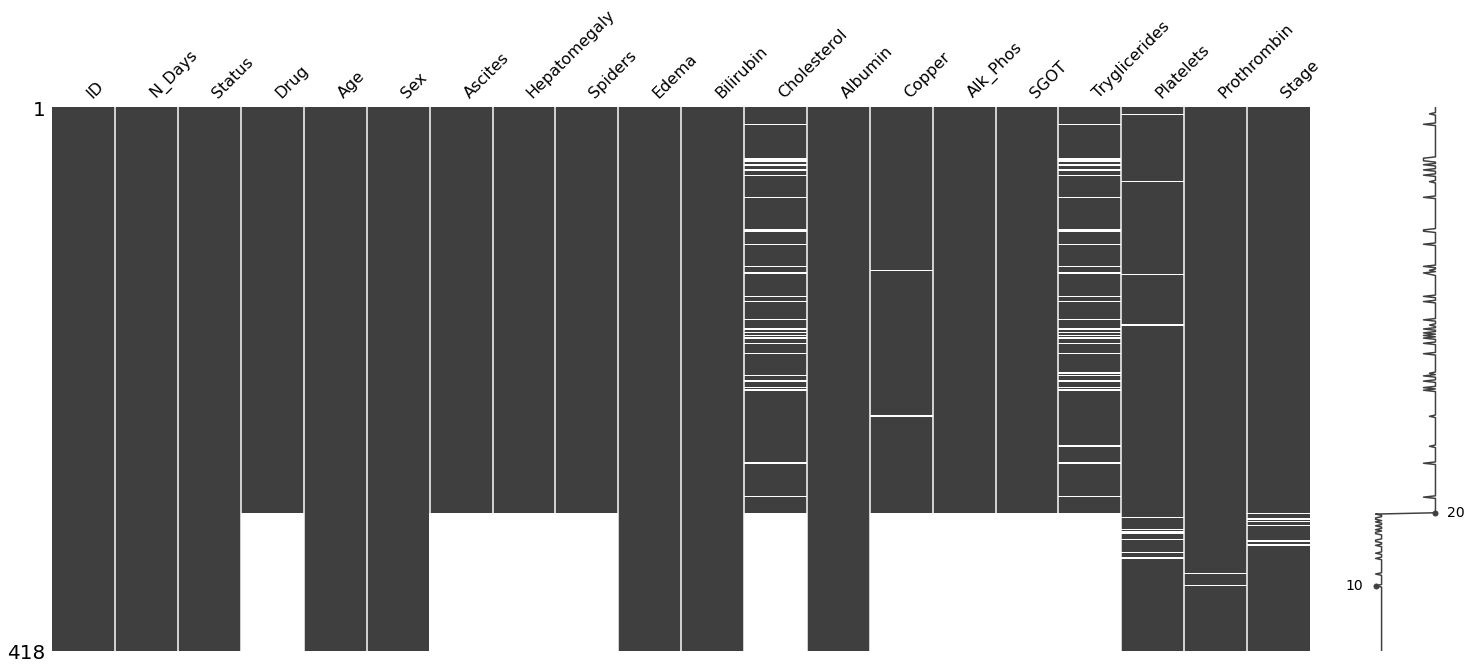

In [7]:
msn.matrix(df)

In [8]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

There is some missing data!

# Survival Analysis

In [9]:
surv_data = df[["N_Days","Status"]]
surv_data.head()

,N_Days,Status
0,400,D
1,4500,C
2,1012,D
3,1925,D
4,1504,CL


* C is censored and CL is censored due to liver transplantation
* D is Death


### Changing status to Binary

In [10]:
def key(x):
    if x == "D":
        return 1
    else:
        return 0

In [11]:
surv_data["Status"] = surv_data.Status.apply(key)

C:\Users\PMMCAR~1\AppData\Local\Temp/ipykernel_8724/1617074368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv_data["Status"] = surv_data.Status.apply(key)


### Changing Time to Years

In [12]:
surv_data.N_Days = surv_data.N_Days.apply(lambda x : x/365)
surv_data = surv_data.rename(columns={"N_Days":"N_Years"})

C:\Users\PMMCardoso\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### KM Curve

In [13]:
from lifelines import KaplanMeierFitter

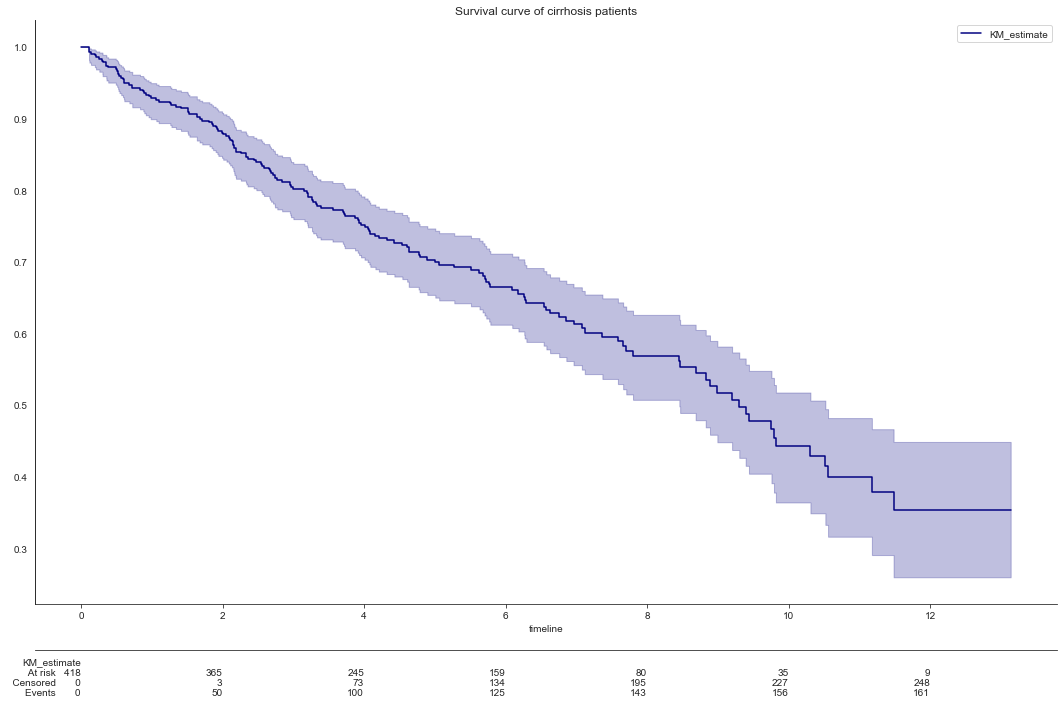

In [14]:
km = KaplanMeierFitter()
T = surv_data.N_Years
E = surv_data.Status

km.fit(T,event_observed=E)


plt.figure(figsize=(15,10))
sns.set_style("white")
km.plot_survival_function(at_risk_counts=True,title = "Survival curve of cirrhosis patients", color = "navy")
sns.despine(top= True)

In [15]:
km.median_survival_time_

9.301369863013699

The median survival time is **9.3 years**!

# Data Analysis

## Univariate Analysis (continuous)

### Changing Age to Years

In [16]:
df.Age = df.Age.apply(lambda x : x/365)

### Deploying Graphs

In [17]:
cont_var = df.select_dtypes("number")
cont_var.drop(["ID","N_Days","Stage"], axis = 1, inplace=True)

C:\Users\PMMCardoso\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


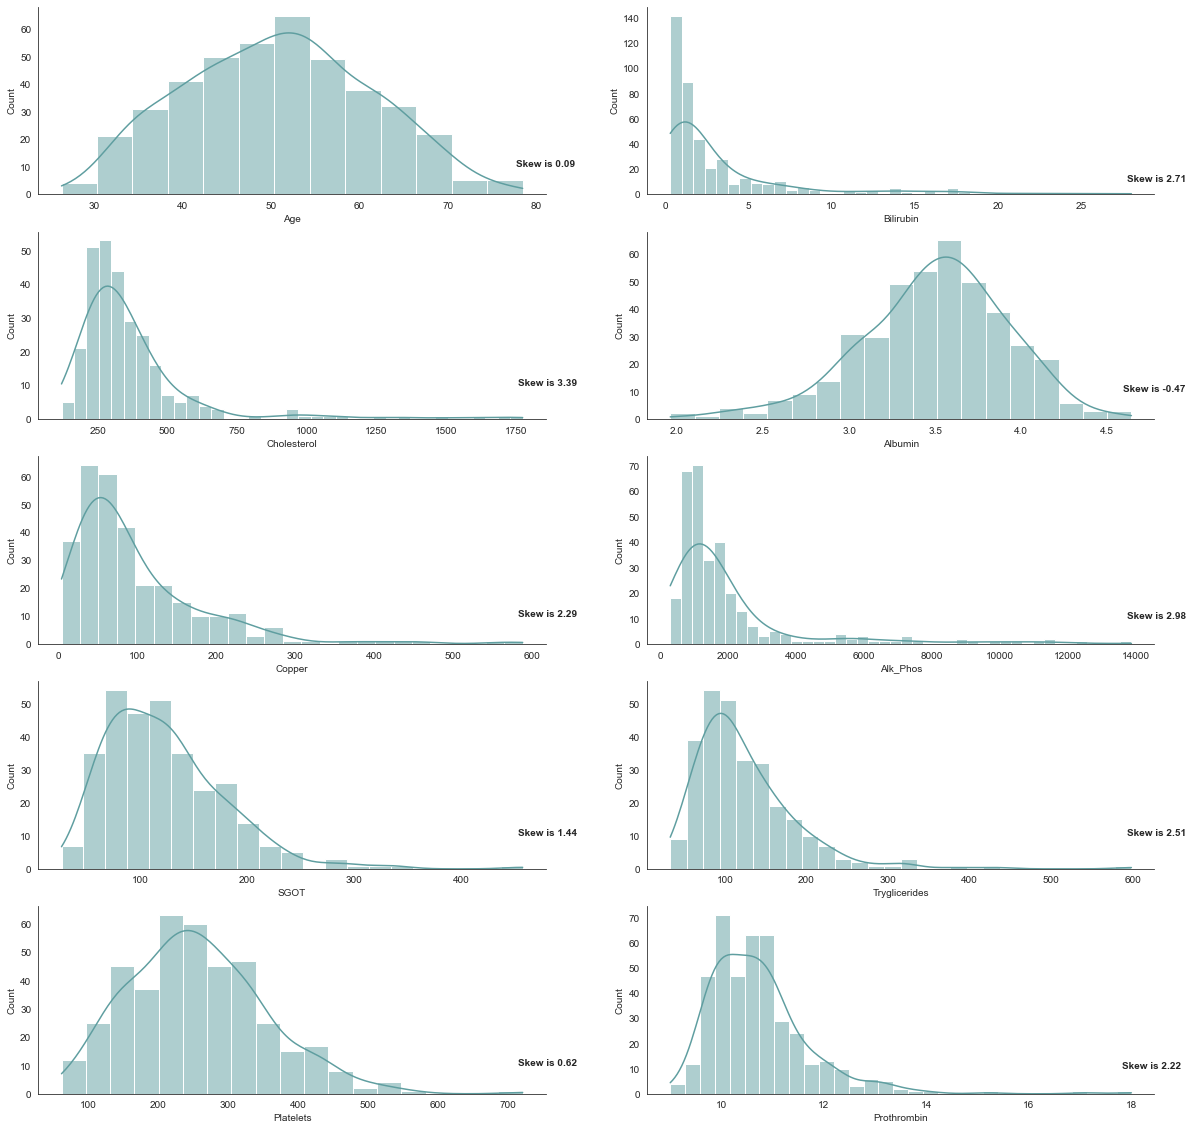

In [18]:
plt.figure(figsize = (20,20))
for i in range(len(cont_var.columns)):
    plt.subplot(5,2,i+1)
    sns.histplot(cont_var.iloc[:,i],kde = True,color = "cadetblue")
    plt.annotate("Skew is {:0.2f}".format(st.skew(cont_var.iloc[:,i], nan_policy="omit")), xy =[0.99*cont_var.iloc[:,i].max(),10],weight = "bold")
    sns.despine(top=True)

## Univariate Analysis (Discrete variables)

In [19]:
disc_var = df.select_dtypes(object)

In [20]:
for i in range(len(disc_var.columns)):
    fig = pe.pie(disc_var, names = disc_var.iloc[:,i].name, width=500, height=400, title = "Distribution of {}".format(disc_var.iloc[:,i].name), color_discrete_map = {"blue","green"})
    fig.show()

## Multivariate Analysis

### Sex and status

In [50]:
pe.sunburst(df, path = ["Sex","Status"], title = "Sex and Status", width = 500, height = 400)

### Bilirubin and Status

In [54]:
pe.box(df, x = "Status", y = "Bilirubin", title = "Bilirubin and Status", width = 400)

* As expected, Bilirubin was higher on patients who died